In [49]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu,shapiro,wilcoxon
from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm
import seaborn as sns
from scipy.stats import chi2_contingency


In [2]:
df = pd.read_csv('Bank.csv')

In [3]:
df

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly
2,ACX570083,35,11300,22290,5989.0,9361.8,Irregular,Monthly
3,ACX570084,27,41680,26970,19589.6,15912.3,Irregular,Quaterly
4,ACX570085,42,27170,27220,14943.5,11160.2,Regular,Quaterly
...,...,...,...,...,...,...,...,...
259,ACX570326,28,35350,22240,15907.5,9785.6,Irregular,Yearly
260,ACX570327,36,21500,34410,10535.0,17893.2,Regular,Quaterly
261,ACX570328,25,27840,24250,16425.6,10427.5,Irregular,Quaterly
262,ACX570329,36,38530,26800,18494.4,11256.0,Regular,Quaterly


In [4]:
df.describe()

,Age,Income,Income2,Deposit,Deposit2
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,35.143939,30104.583333,25014.545455,15601.345076,12915.172348
std,6.045622,9383.489941,5079.402956,5184.112352,3038.508903
min,16.000000,5110.000000,11200.000000,2606.100000,5104.000000
25%,31.000000,24207.500000,21797.500000,11934.975000,10554.575000
50%,35.000000,30360.000000,25160.000000,15561.100000,12881.200000
75%,39.000000,36132.500000,28532.500000,19049.375000,15140.825000
max,49.000000,57000.000000,38300.000000,31920.000000,21065.000000


# In the manager’s report, it is mentioned that the average Age of the Customers is 35. 

In [5]:
shapiro(df['Age'])

ShapiroResult(statistic=0.9926846623420715, pvalue=0.22020867466926575)

In [6]:
ttest_1samp(df['Age'],35)

Ttest_1sampResult(statistic=0.38684825882837526, pvalue=0.6991813724146171)

In [7]:
# YES AGE IS AROUND 35(NULL HYPOTHESIS TRUE)

# Before corona the mean income was 40000

In [8]:
shapiro(df.Income)

ShapiroResult(statistic=0.9979685544967651, pvalue=0.9867026805877686)

In [9]:
ttest_1samp(df['Income'],40000)

Ttest_1sampResult(statistic=-17.134508702826132, pvalue=1.0354363597848094e-44)

In [10]:
# NO INCOME IS NOT AROUND 40000,Alternate hypothesis holds true

# EFFECT OF AGE GROUP ON INCOME

In [11]:
df.columns

Index(['User I.D', 'Age', 'Income', 'Income2', 'Deposit', 'Deposit2',
       'Customer_type', 'Deposit_Scheme'],
      dtype='object')

In [18]:
bins = [0,18,24,30,40,48,np.inf]
names = "Group_A Group_B Group_C Group_D Group_E Group_F".split()
df['Age_Group'] = pd.cut(df.Age,bins,labels=names)

In [19]:
df

,User I.D,Age,Income,Income2,Deposit,Deposit2,Customer_type,Deposit_Scheme,Age_Group
0,ACX570081,26,32900,20230,14805.0,11935.7,Irregular,Hal-Yearly,Group_C
1,ACX570082,43,37390,21410,19442.8,10276.8,Regular,Quaterly,Group_E
2,ACX570083,35,11300,22290,5989.0,9361.8,Irregular,Monthly,Group_D
3,ACX570084,27,41680,26970,19589.6,15912.3,Irregular,Quaterly,Group_C
4,ACX570085,42,27170,27220,14943.5,11160.2,Regular,Quaterly,Group_E
...,...,...,...,...,...,...,...,...,...
259,ACX570326,28,35350,22240,15907.5,9785.6,Irregular,Yearly,Group_C
260,ACX570327,36,21500,34410,10535.0,17893.2,Regular,Quaterly,Group_D
261,ACX570328,25,27840,24250,16425.6,10427.5,Irregular,Quaterly,Group_C
262,ACX570329,36,38530,26800,18494.4,11256.0,Regular,Quaterly,Group_D


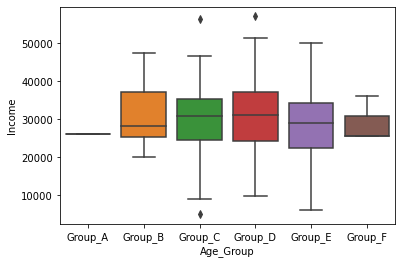

In [22]:
sns.boxplot(df.Age_Group,df.Income);

In [27]:
mod = ols('Income ~ Age_Group',data=df).fit()
aov_table = sm.stats.anova_lm(mod,type=2)

In [28]:
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
Age_Group    5.0  1.806153e+08  3.612307e+07  0.405621  0.844716
Residual   258.0  2.297650e+10  8.905622e+07       NaN       NaN


In [29]:
# Ho holds true meaning all age groups get same salary

# EFFECT OF DEPOSIT SCHEME ON INCOME

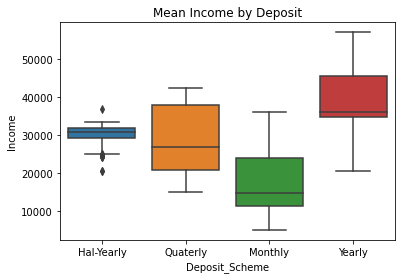

In [31]:
sns.boxplot(x = "Deposit_Scheme", y = "Income", data = df) 
plt.title('Mean Income by Deposit') 
plt.show() 

In [36]:
mod = ols('Income ~ Deposit_Scheme',data=df).fit()
aov_table = sm.stats.anova_lm(mod,type=2)
print(aov_table)
# df['Deposit_Scheme']

                   df        sum_sq       mean_sq         F        PR(>F)
Deposit_Scheme    3.0  7.799853e+09  2.599951e+09  44.01742  4.891310e-23
Residual        260.0  1.535727e+10  5.906641e+07       NaN           NaN


In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
print(pairwise_tukeyhsd(df['Income'],df['Deposit_Scheme'])) 

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1    group2   meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------
Hal-Yearly  Monthly -11265.787  0.001 -15750.5592 -6781.0149   True
Hal-Yearly Quaterly -1084.7775 0.7602   -4081.533  1911.9779  False
Hal-Yearly   Yearly  9037.4893  0.001   5420.7781 12654.2006   True
   Monthly Quaterly 10181.0095  0.001   5923.9097 14438.1093   True
   Monthly   Yearly 20303.2764  0.001  15589.1534 25017.3993   True
  Quaterly   Yearly 10122.2668  0.001    6792.054 13452.4797   True
-------------------------------------------------------------------


# Income vs Customer type

In [39]:
print(pairwise_tukeyhsd(df['Income'],df['Customer_type'])) 

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1   group2 meandiff p-adj    lower      upper   reject
-------------------------------------------------------------
Irregular Regular 388.1275 0.7869 -2330.1655 3106.4204  False
-------------------------------------------------------------


In [41]:
mod = ols('Income ~ Customer_type',data=df).fit()
aov_table = sm.stats.anova_lm(mod,type=2)
print(aov_table)

                  df        sum_sq       mean_sq         F    PR(>F)
Customer_type    1.0  6.984353e+06  6.984353e+06  0.079045  0.778818
Residual       262.0  2.315014e+10  8.835929e+07       NaN       NaN


In [ ]:
# HERE CUST TYPE IS ONLY 2 SO WE SHOULD USE TWO SAMPLE TTEST AND NOT THE ABOVE TESTS

# EFFECT OF AGE GROUP ON DEPOSIT

In [ ]:
# numerical deposit and more than 2 categories in age group so ANOVE

In [42]:
mod = ols('Deposit ~ Age_Group',data=df).fit()
aov_table = sm.stats.anova_lm(mod,type=2)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
Age_Group    5.0  5.336406e+07  1.067281e+07  0.392541  0.853745
Residual   258.0  7.014766e+09  2.718902e+07       NaN       NaN


In [ ]:
# for all age group same deposit

# The bank wants the see the variation of average Deposit over different Deposit Scheme 

In [43]:
df['Deposit_Scheme'].value_counts()

Quaterly      113
Hal-Yearly     72
Yearly         52
Monthly        27
Name: Deposit_Scheme, dtype: int64

In [44]:
mod = ols('Deposit ~ Deposit_Scheme',data=df).fit()
aov_table = sm.stats.anova_lm(mod,type=2)
print(aov_table)

                   df        sum_sq       mean_sq          F        PR(>F)
Deposit_Scheme    3.0  1.964786e+09  6.549286e+08  33.366631  2.808481e-18
Residual        260.0  5.103345e+09  1.962825e+07        NaN           NaN


In [ ]:
# Yes for differebnt deposit schemes,different deposits

# AGE GROUP AFFECTS DEPOSIT SCHEME

In [45]:
# 2 categories and more than two sub catgories so chi square

In [47]:
CT=pd.crosstab(df['Deposit_Scheme'],df['Age_Group'])
CT

Age_Group,Group_A,Group_B,Group_C,Group_D,Group_E,Group_F
Deposit_Scheme,,,,,,
Hal-Yearly,0,3,15,41,13,0
Monthly,0,0,5,15,6,1
Quaterly,1,5,15,71,19,2
Yearly,0,3,11,29,9,0


In [50]:
chi2_contingency(CT)

(9.050904513179914,
 0.8748407909784324,
 15,
 array([[ 0.27272727,  3.        , 12.54545455, 42.54545455, 12.81818182,
          0.81818182],
        [ 0.10227273,  1.125     ,  4.70454545, 15.95454545,  4.80681818,
          0.30681818],
        [ 0.4280303 ,  4.70833333, 19.68939394, 66.77272727, 20.11742424,
          1.28409091],
        [ 0.1969697 ,  2.16666667,  9.06060606, 30.72727273,  9.25757576,
          0.59090909]]))

In [ ]:
# proportion pattern has similar pattern

# AGE GROUP VS CUTOMER TYPE

In [51]:
CT=pd.crosstab(df['Customer_type'],df['Age_Group'])
CT

Age_Group,Group_A,Group_B,Group_C,Group_D,Group_E,Group_F
Customer_type,,,,,,
Irregular,1,4,39,11,3,2
Regular,0,7,7,145,44,1


In [52]:
chi2_contingency(CT)

(137.70576068469086,
 5.498541441859924e-28,
 5,
 array([[  0.22727273,   2.5       ,  10.45454545,  35.45454545,
          10.68181818,   0.68181818],
        [  0.77272727,   8.5       ,  35.54545455, 120.54545455,
          36.31818182,   2.31818182]]))

In [14]:
# 5. The bank wants the see the variation of average income over different Customer type 
# Irregular_Customer = np.array(data[data['Customer_type']=='Irregular']['Income']) Regular_Customer = np.array(data[data['Customer_type']=='Regular']['Income']) 
# Before Corona the mean Deposit of the customers was 15500 
# 7.Now the bank wants the see the variation of average Deposit over different age group 
# ####Conclussion : As the p-value (.853745) is greater than alpha (0.05) implies,We fail to reject Null hypothesis.That means mean Deposit over different Age group is same or in other words different Age Group has no influence on Deposit. 
# 8.The bank wants the see the variation of average Deposit over different Deposit Scheme 
# ####Conclussion : As the p-value (2.808481e-18) is less than alpha (0.05) implies,We reject Null hypothesis.That means mean Deposit over different Deposit Scheme are not same or in other words different Deposit Scheme has influence on Deposit. Now,we will try to find out for which Deposit scheme the mean deposit are not same.For that,we will conduct a Tuckey test. 

In [ ]:
9. The bank wants the see the variation of average Deposit over different Customer type 
10.Does there exist any relationship between Age Group & Deposit Scheme 

In [ ]:
CT=pd.crosstab(data['Deposit_Scheme'],data['Age_Group']) 

In [ ]:
11.Does there exist any relationship between Age Group & Customer type 
CT=pd.crosstab(data['Customer_type'],data['Age_Group']) CT 

In [ ]:
12.Does there exist any relationship between Customer type & Deposit Scheme 
13.After Corona the mean Income of the customers was 25000. 
14. After Corona the mean Deposit of the customers was 13000. 
import matplotlib.pyplot as plt plt.hist(data.Deposit2) 
15.Is there any effect of Corona on Income 
16.Is there any effect of Corona on Deposit 